# by: Abdulrahman Saeed

## LOAN DEFAULT PREDICTION
• Build a Random Forest model with the dataset provided in the shared drive. free to do any kind of EDA (using all statistical tools and methodology) as per  choice and play around with the data. Following are the must have things for submission of project :

        ○ Proper EDA with explanation of impactful and useful variables
        ○ Graphs wherever necessary
        ○ Metrics for model evaluation:
                           • Confusion Matrix
                           • Accuracy Score
                           • F1 score, Precision, Recall, ROC-AUC 
                           • Model Optimization using K fold cross validation

• Consider column B (Risk_flag) as the target (y) variable and rest of the columns as feature variables.

## import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import RandomOverSampler

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_absolute_error, accuracy_score, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('Dataset/train.csv', index_col=0)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


### Basic Information of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


### Summary statistics

In [4]:
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


#### Checking Missing Values

In [5]:
df.isna().any().sum()

0

Insight : There are no missing values.

## EDA

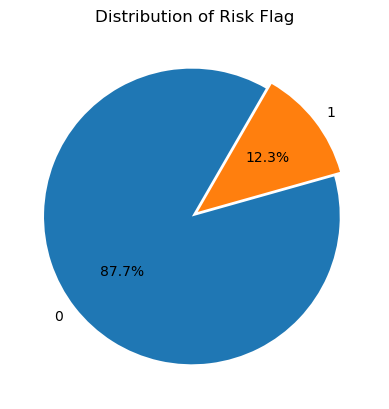

In [6]:
plt.pie(df['Risk_Flag'].value_counts(), labels=df['Risk_Flag'].value_counts().index, 
        explode=(0.025,0.025), autopct='%1.1f%%', startangle=60)
plt.title('Distribution of Risk Flag')
plt.show()

Insight : The dependent feature ' Risk Flag' contains 87.7%  are not risk and 12.3% are risk. So it's clear that the dataset is not balanced.

### Checking distribution of " Income", "Age",  "Experience", "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS" using histplot

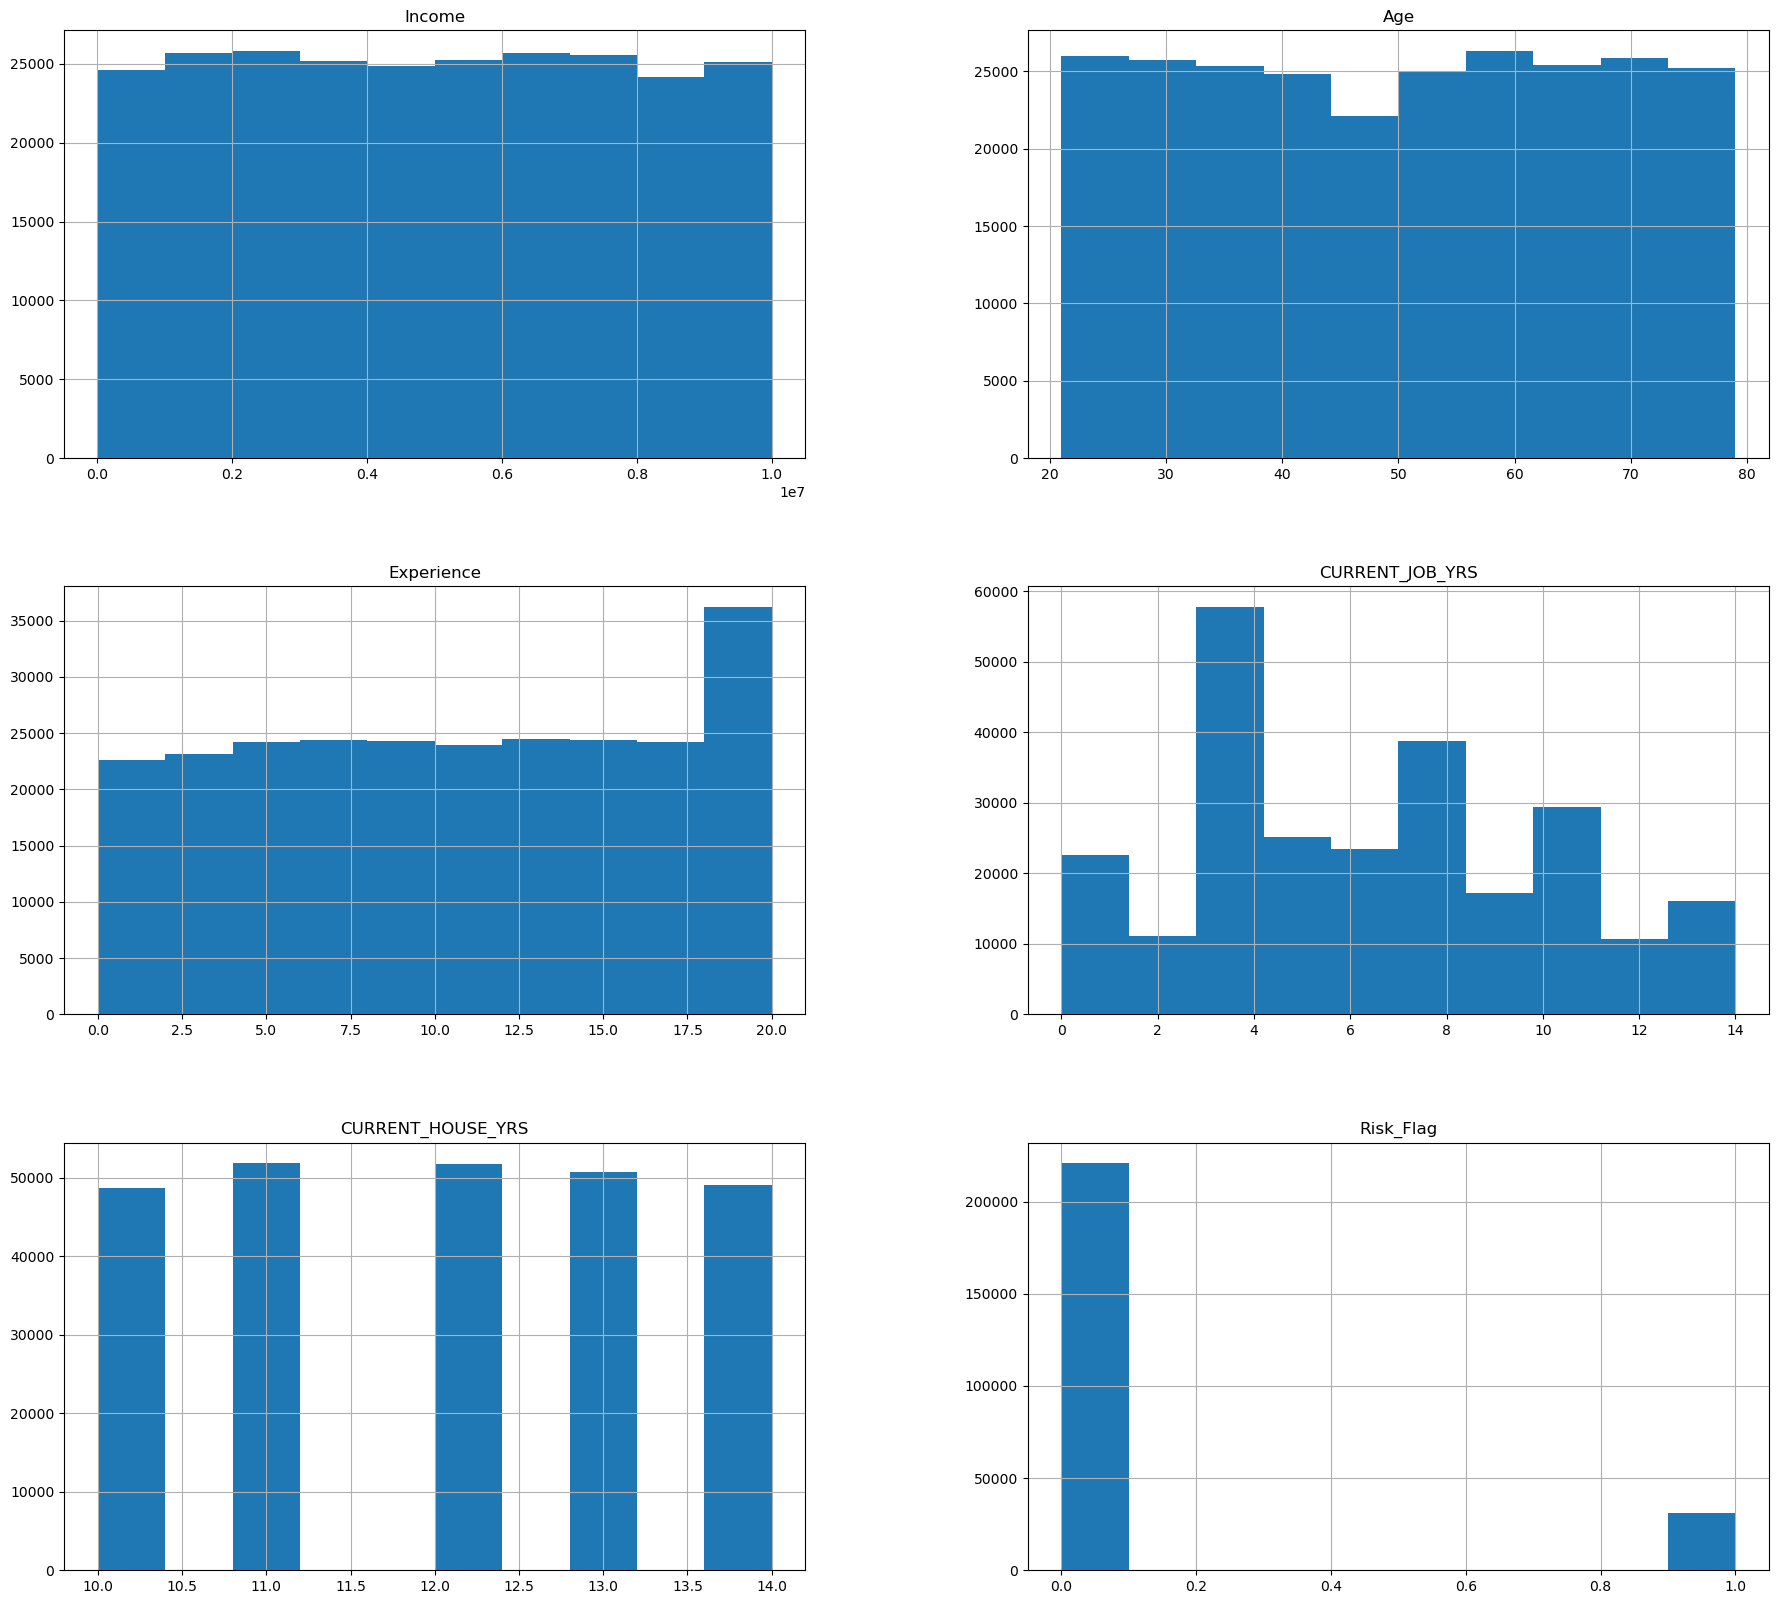

In [7]:
df.hist(figsize=(22, 20))
plt.show()

### Checking risk flag according to "Married/Single"

<Axes: xlabel='Married/Single', ylabel='count'>

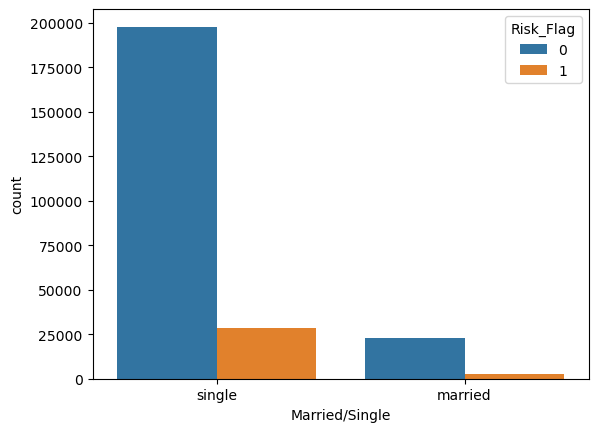

In [8]:
sns.countplot(data=df, x='Married/Single', hue='Risk_Flag')

### Checking risk flag according to "House Ownership"

<Axes: xlabel='House_Ownership', ylabel='count'>

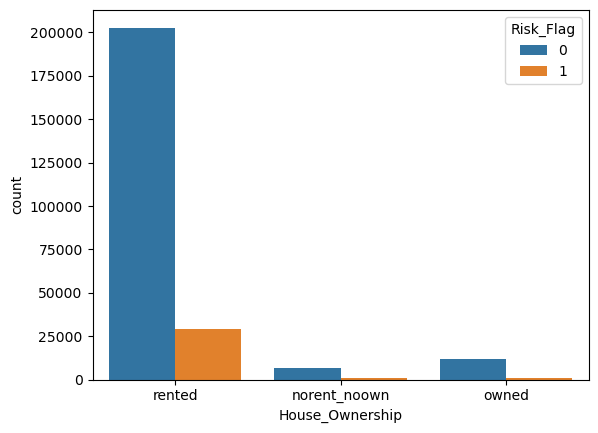

In [9]:
sns.countplot(data=df, x='House_Ownership', hue='Risk_Flag')

### Checking risk flag according to "Car Ownership"

<Axes: xlabel='Car_Ownership', ylabel='count'>

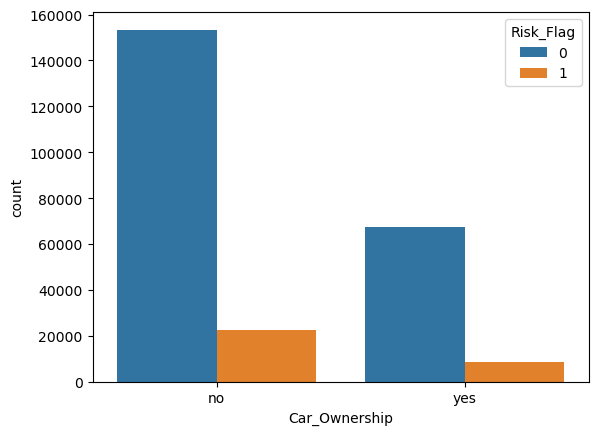

In [10]:
sns.countplot(data=df, x='Car_Ownership', hue='Risk_Flag')

### Checking risk flag according to "Age"

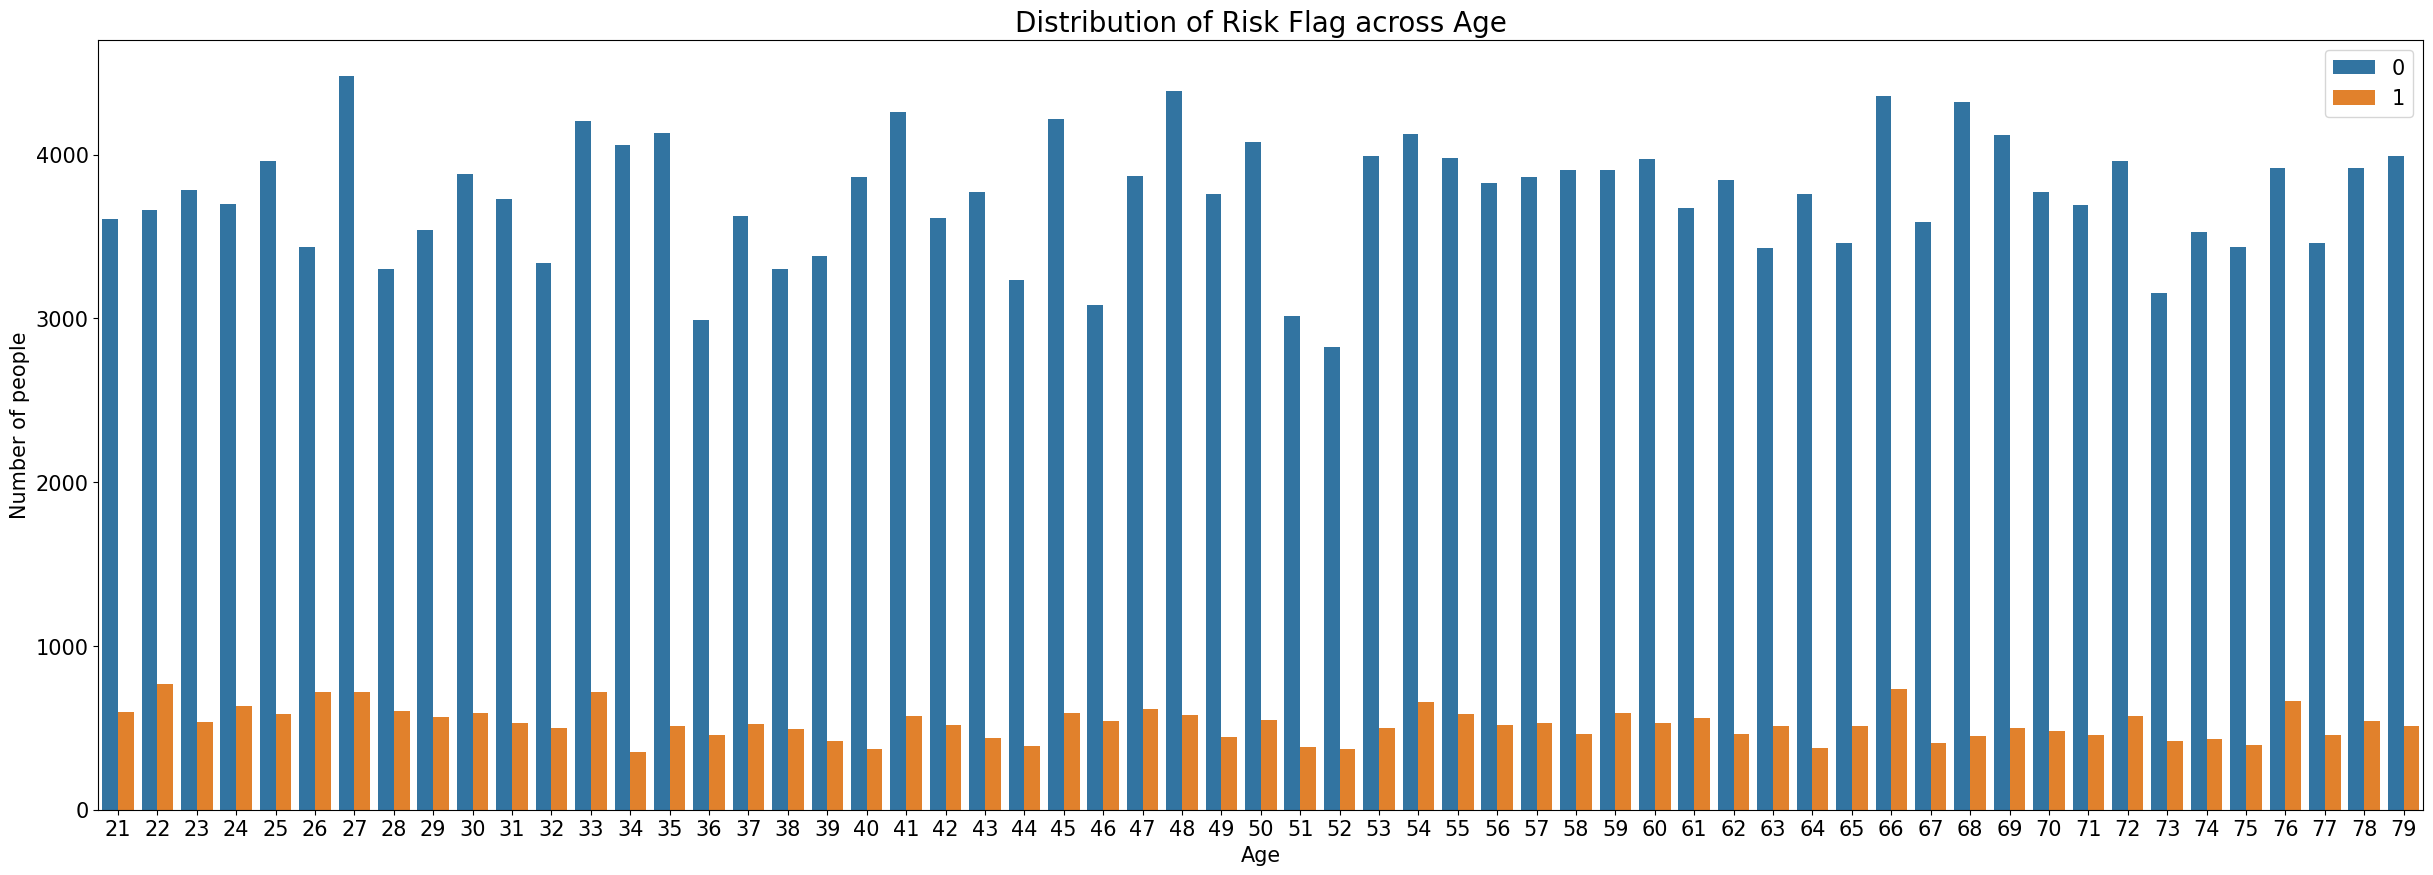

In [11]:
plt.figure(figsize=(30, 10))
sns.countplot(data=df, x='Age', hue='Risk_Flag')
plt.title('Distribution of Risk Flag across Age', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of people', fontsize = 15)
plt.tick_params(labelsize=15)
plt.legend(prop={'size': 15})

plt.show()

### Checking risk flag according to "Experience"

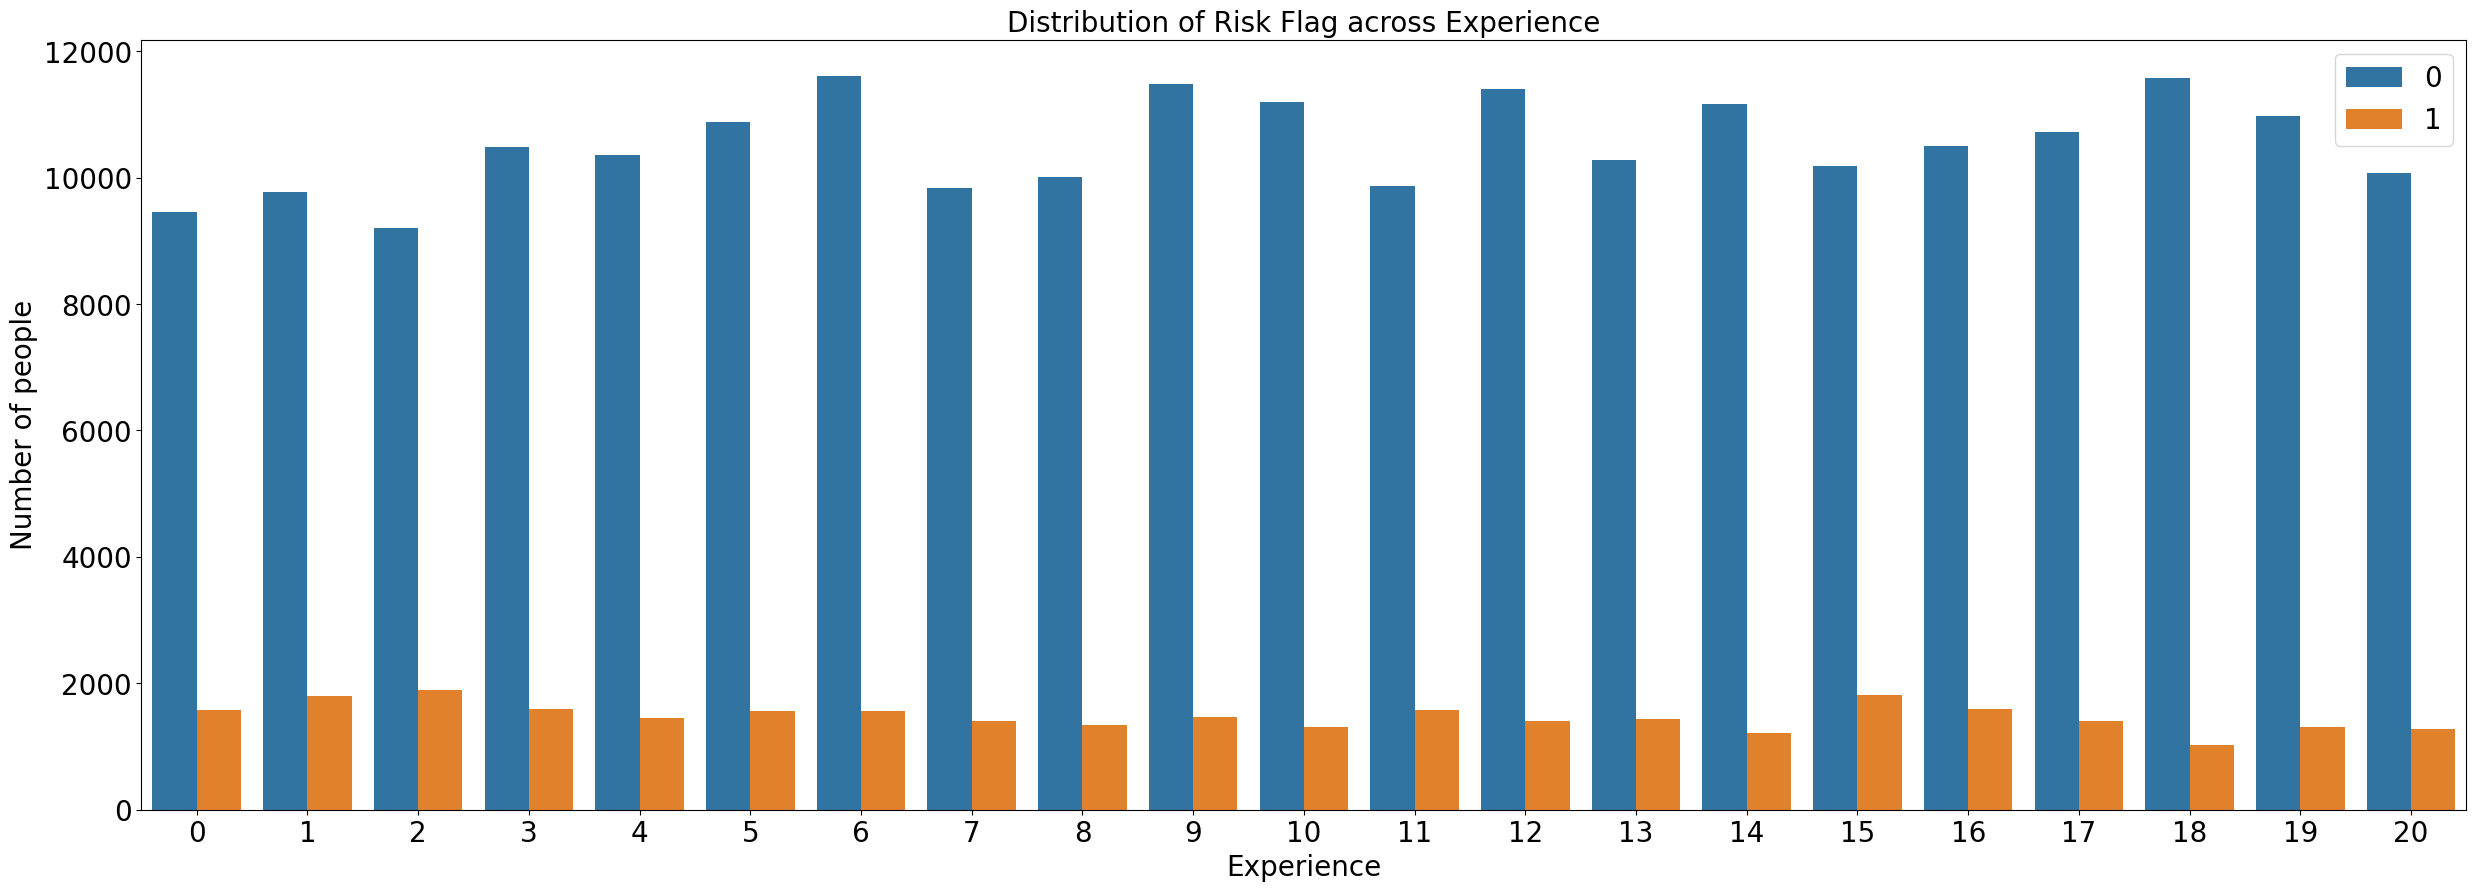

In [12]:
plt.figure(figsize=(30, 10))
sns.countplot(data=df, x='Experience', hue='Risk_Flag')
plt.title('Distribution of Risk Flag across Experience', fontsize = 20)
plt.xlabel('Experience', fontsize = 20)
plt.ylabel('Number of people', fontsize = 20)
plt.tick_params(labelsize=20)
plt.legend(prop={'size': 20})

plt.show()

### Checking risk flag according to "CURRENT_JOB_YRS"

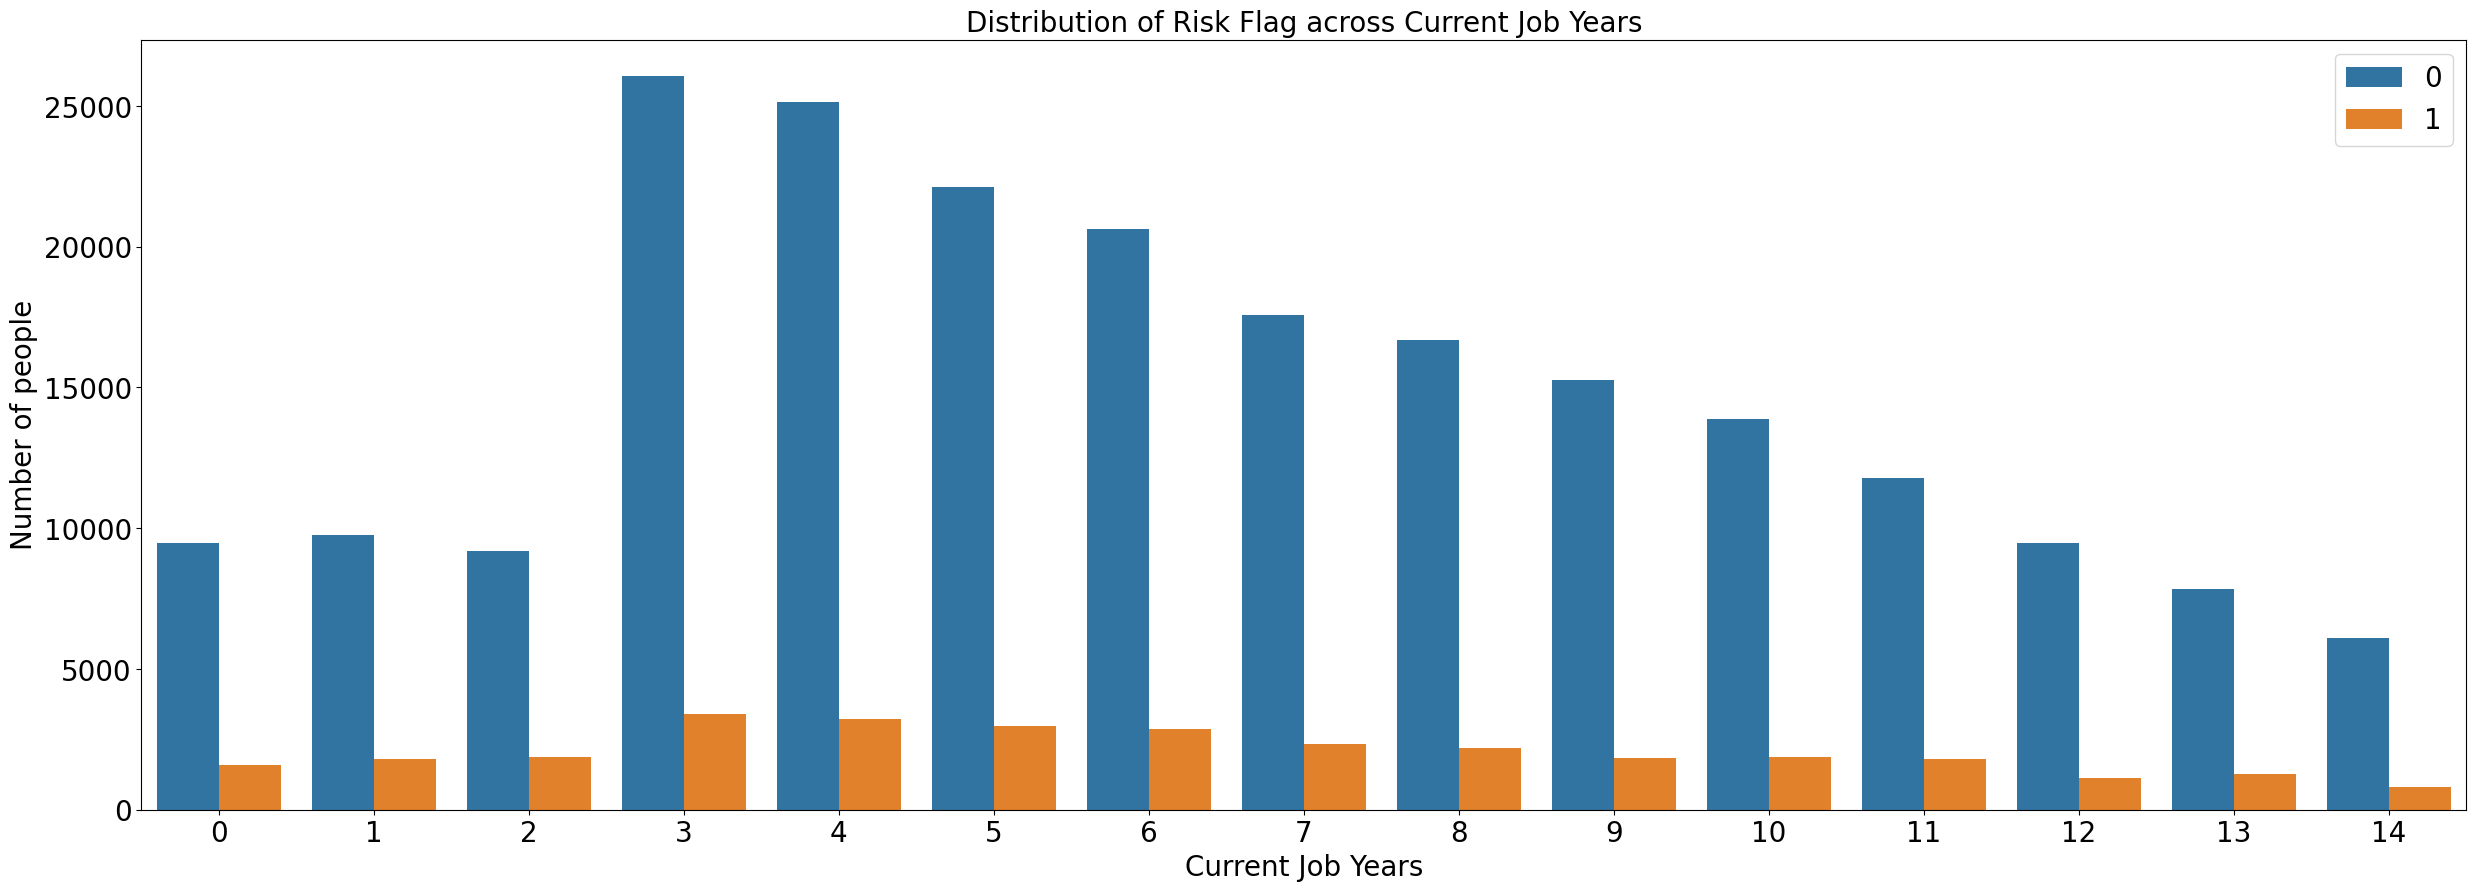

In [13]:
plt.figure(figsize=(30, 10))
sns.countplot(data=df, x='CURRENT_JOB_YRS', hue='Risk_Flag')
plt.title('Distribution of Risk Flag across Current Job Years', fontsize = 20)
plt.xlabel('Current Job Years', fontsize = 20)
plt.ylabel('Number of people', fontsize = 20)
plt.tick_params(labelsize=20)
plt.legend(prop={'size': 20})

plt.show()

### Checking risk flag according to "CURRENT_HOUSE_YRS"

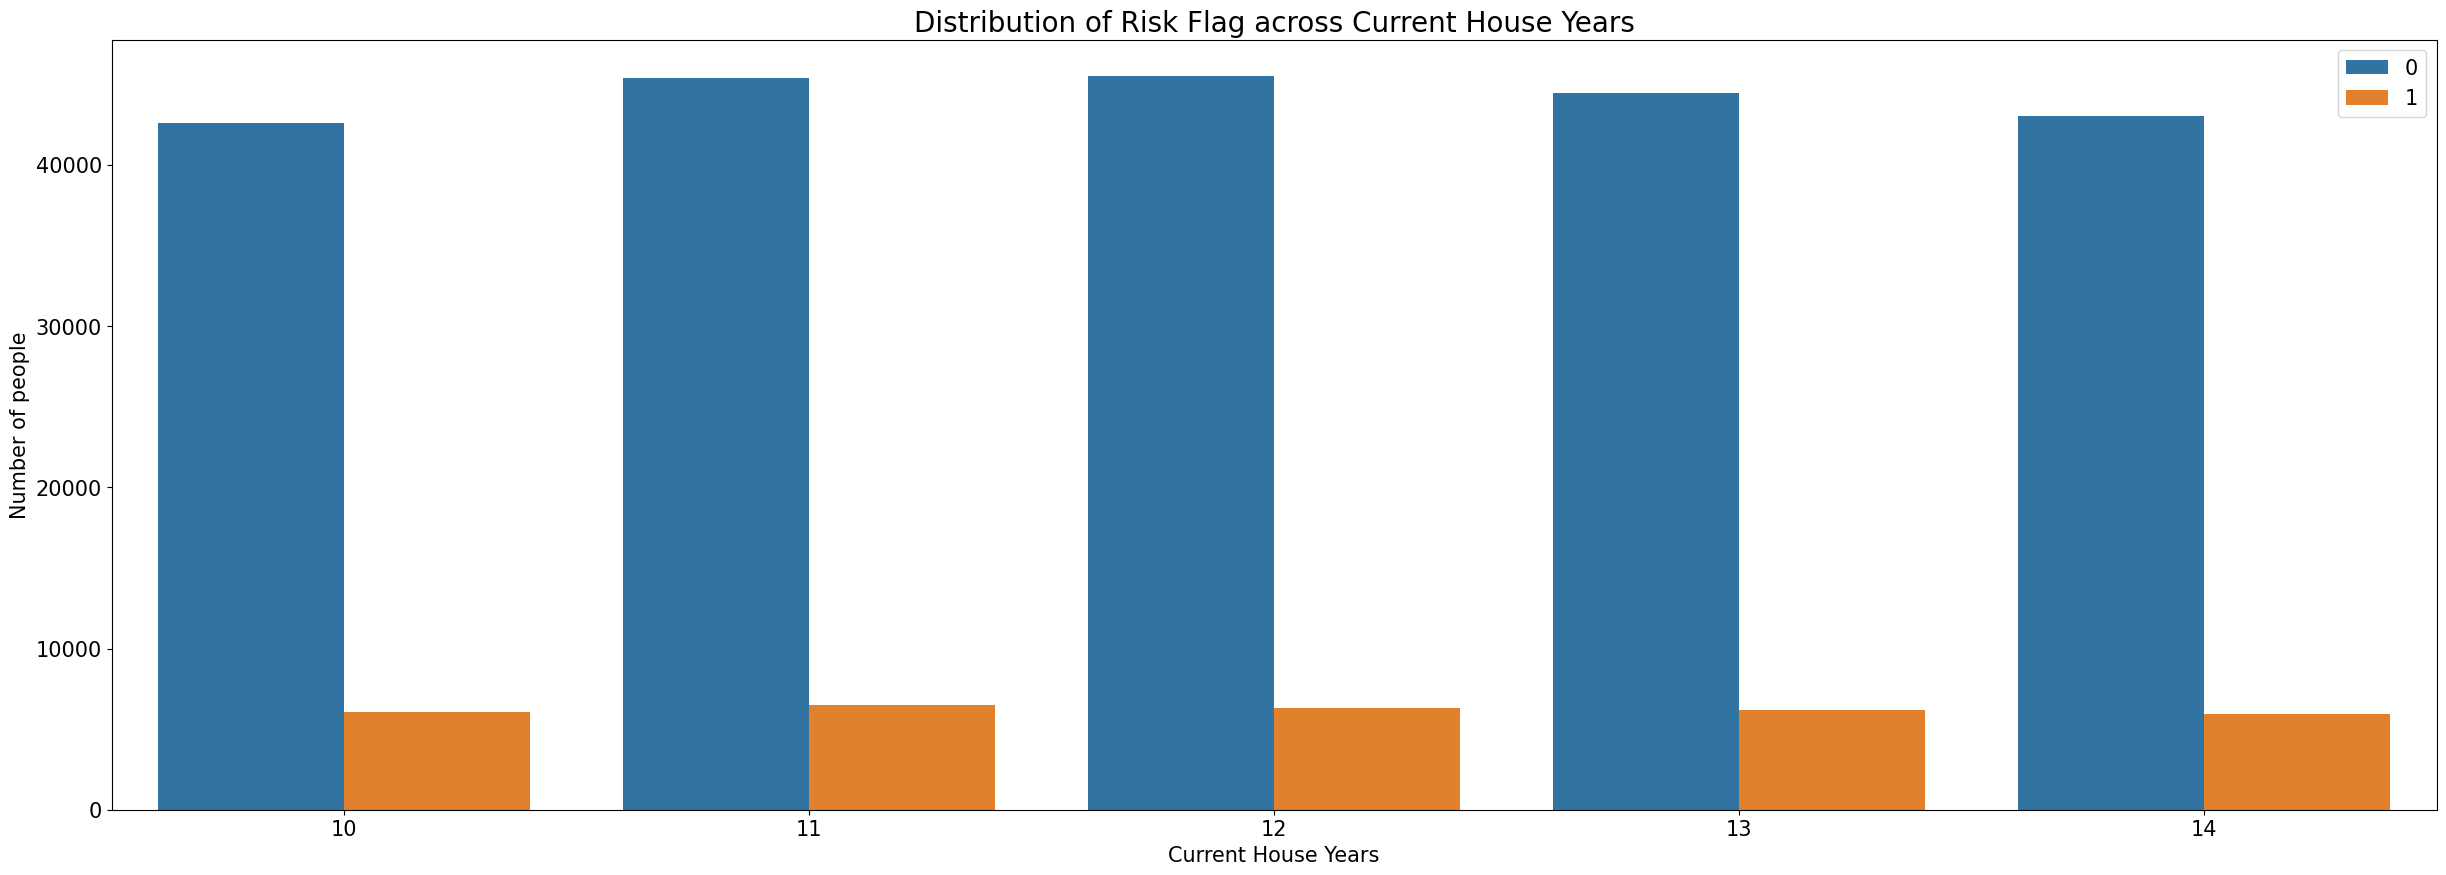

In [14]:
plt.figure(figsize=(30, 10))
sns.countplot(data=df, x='CURRENT_HOUSE_YRS', hue='Risk_Flag')
plt.title('Distribution of Risk Flag across Current House Years', fontsize = 20)
plt.xlabel('Current House Years', fontsize = 15)
plt.ylabel('Number of people', fontsize = 15)
plt.tick_params(labelsize=15)
plt.legend(prop={'size': 15})

plt.show()

### Checking risk flag according to "Profession"

<Axes: xlabel='count', ylabel='Profession'>

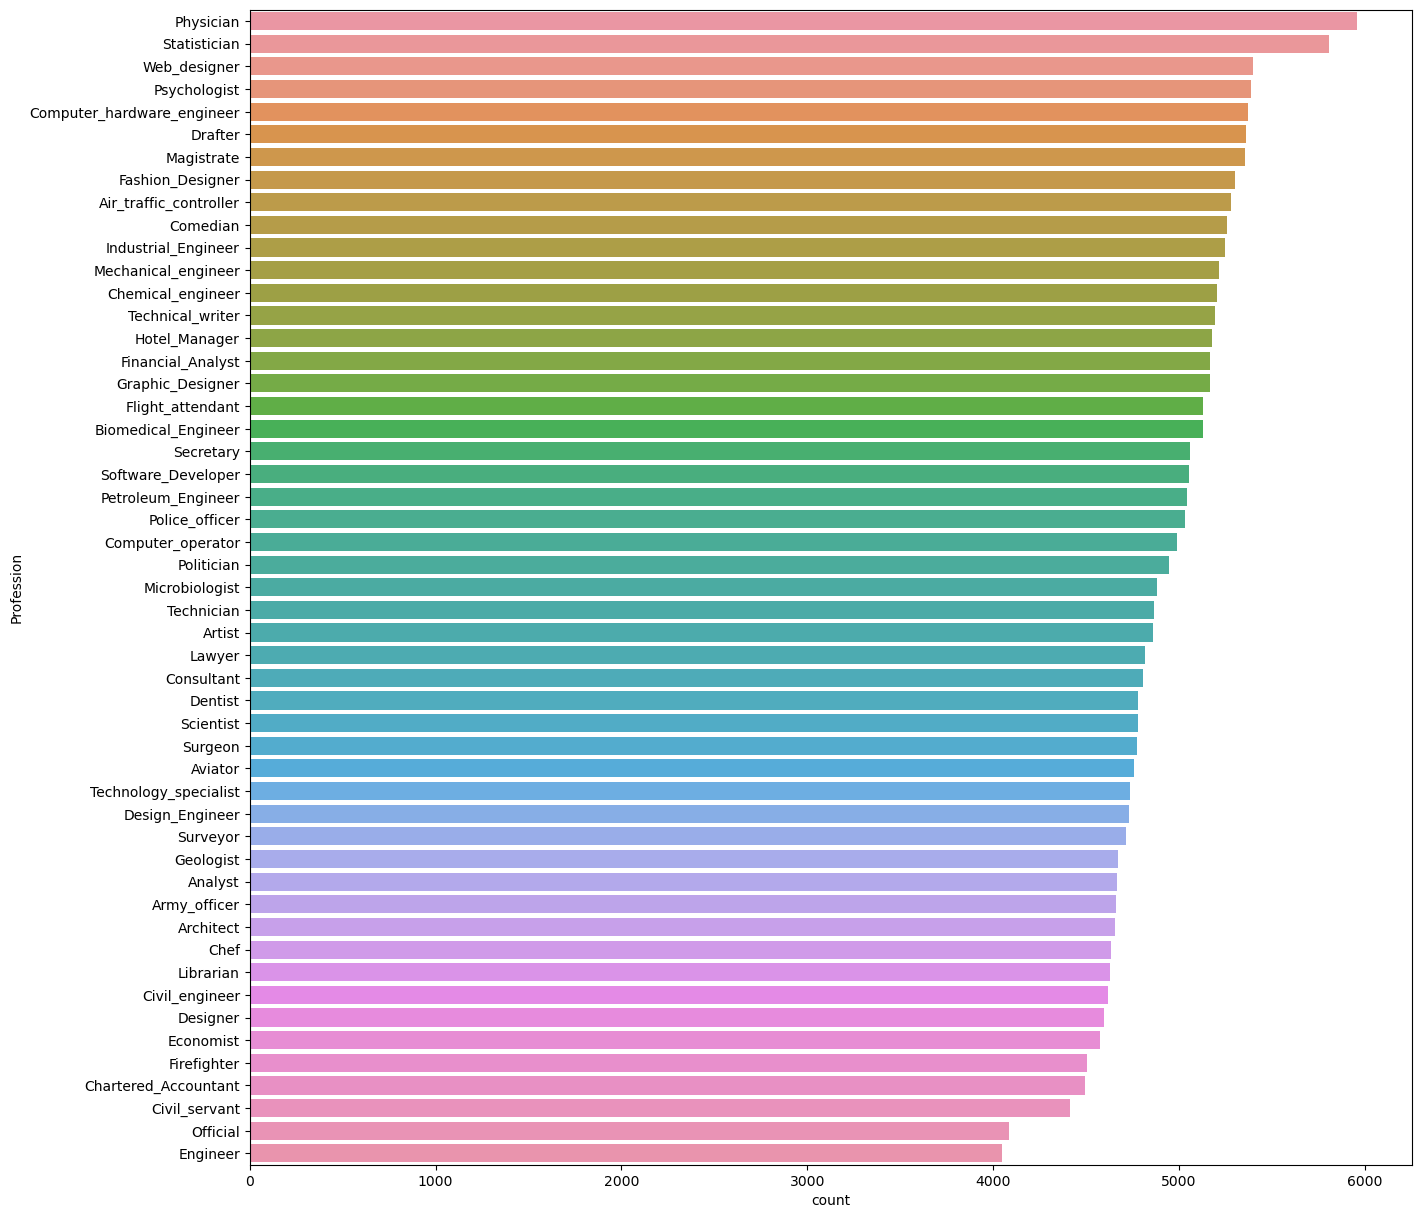

In [15]:
professionals = df["Profession"].value_counts(ascending=False)

plt.figure(figsize=(15, 15))
sns.countplot(data=df, y='Profession', order=professionals.index)

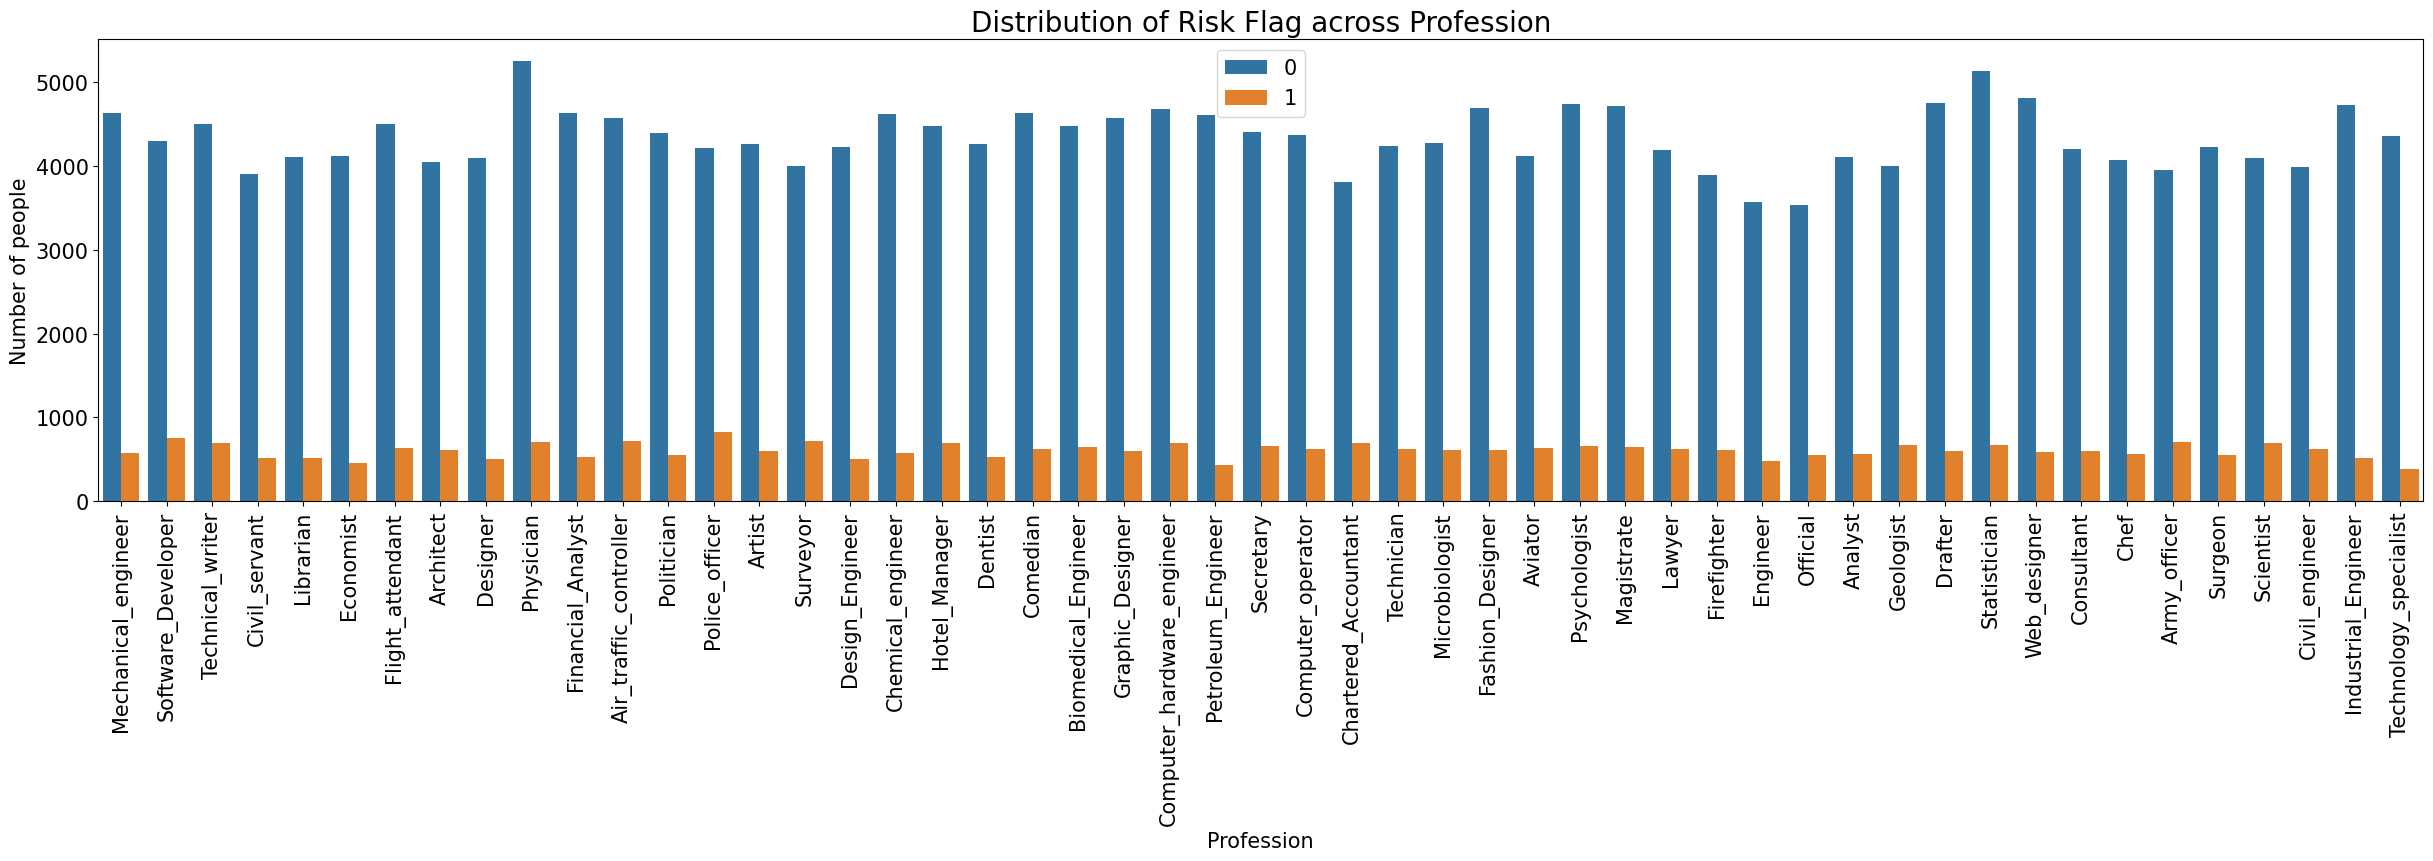

In [16]:
plt.figure(figsize=(30, 6))
sns.countplot(data=df, x='Profession', hue='Risk_Flag')
plt.title('Distribution of Risk Flag across Profession', fontsize = 20)
plt.xlabel('Profession', fontsize = 15)
plt.ylabel('Number of people', fontsize = 15)
plt.tick_params(labelsize=15)
plt.legend(prop={'size': 15})
plt.xticks(rotation=90)

plt.show()

##### Insight:
            • Physician has highest number of loan taker, That is 5957.
            • Statistician has second highest number of loan taker, That is 5806.
            • Web Designer third highest number of loan taker, That is 5397.
            
         And
            • Engineer has lowest number of loan taker, That is 4048.
            • Official has second lowest number of loan taker, That is 4087.
            • Civil Servant third lowest number of loan taker, That is 4413.

### Checking risk flag according to "CITY"

<Axes: xlabel='count', ylabel='CITY'>

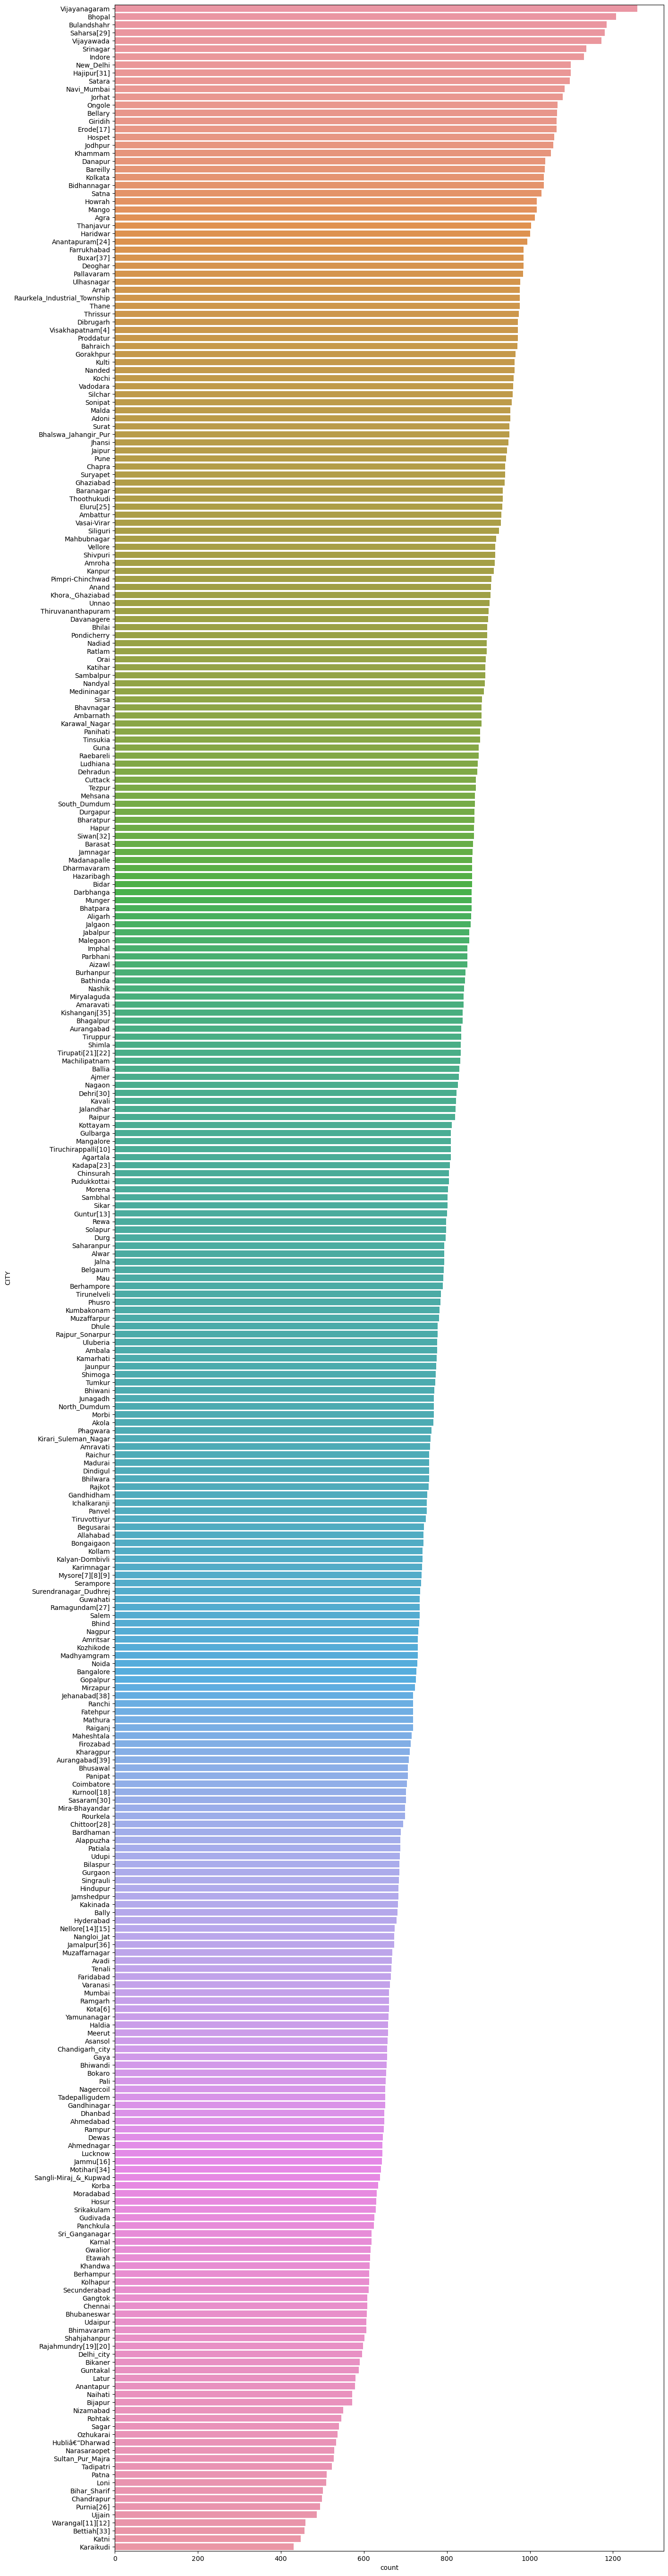

In [17]:
cities = df["CITY"].value_counts(ascending=False)

plt.figure(figsize=(15, 70))
sns.countplot(data=df, y='CITY', order=cities.index)

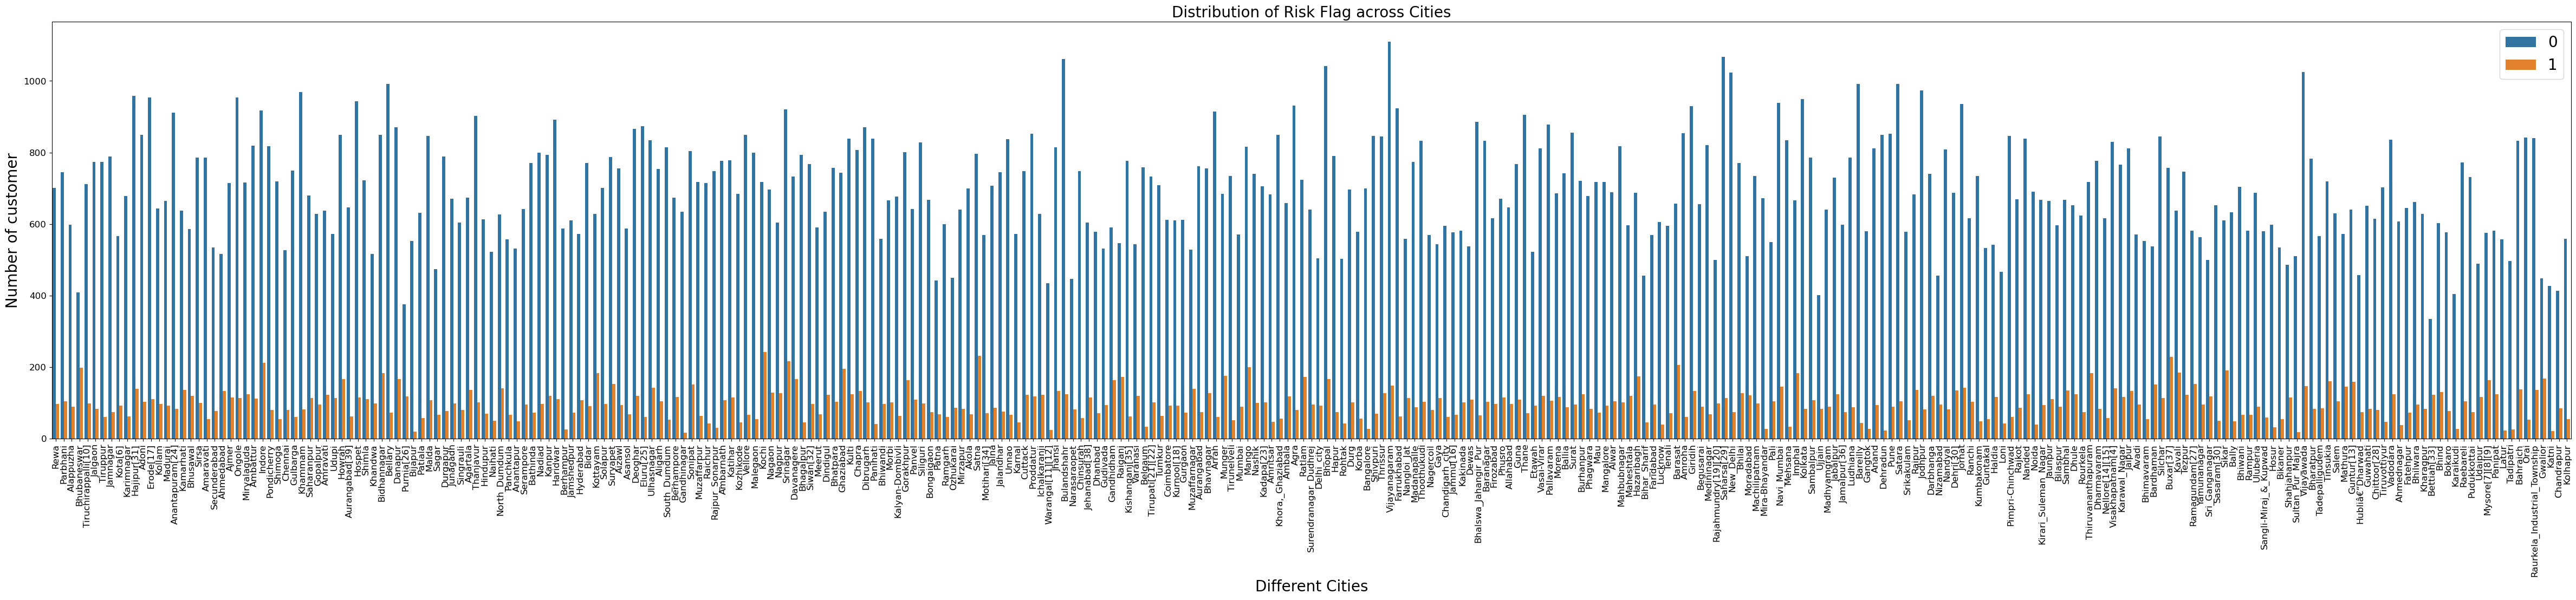

In [18]:
plt.figure(figsize=(60, 10))

sns.countplot(data=df, x='CITY', hue='Risk_Flag')

plt.title("Distribution of Risk Flag across Cities", fontsize = 20)
plt.xlabel("Different Cities", fontsize = 20)
plt.ylabel("Number of customer", fontsize = 20)
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 20})
plt.xticks(rotation=90)

plt.show()

<Axes: xlabel='count', ylabel='STATE'>

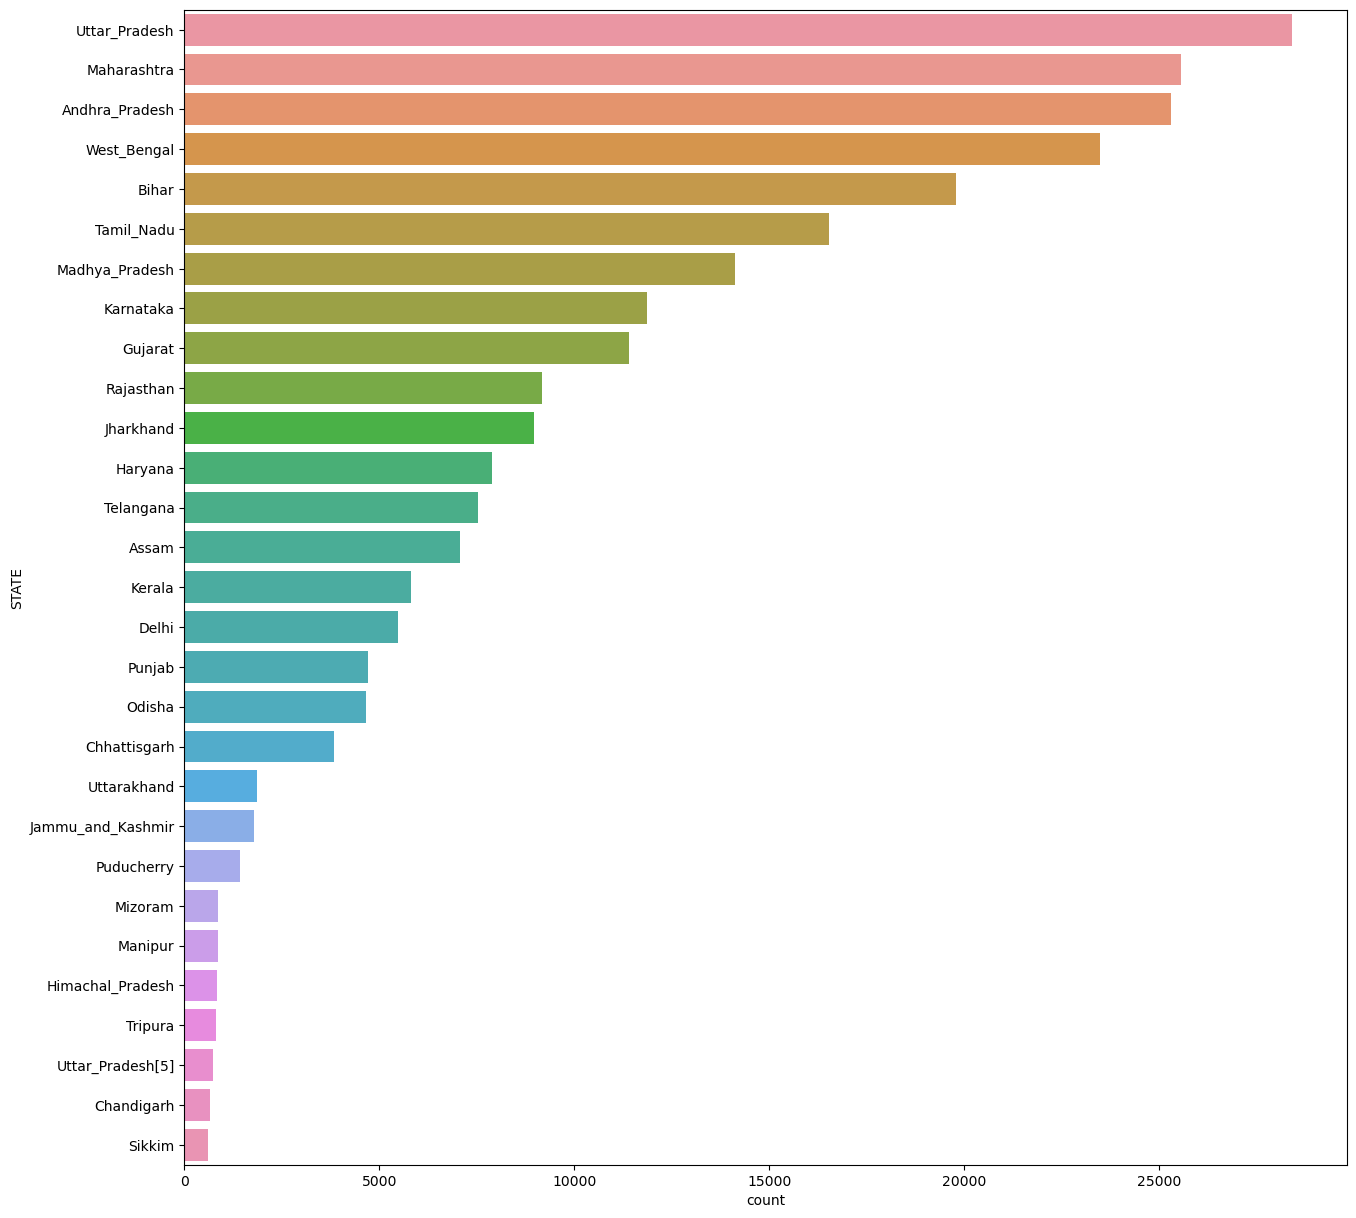

In [19]:
states = df["STATE"].value_counts(ascending=False)

plt.figure(figsize=(15, 15))
sns.countplot(data=df, y='STATE', order=states.index)

##### Insight:
            • Vijayanagaram has highest number of loan taker, That is 1259.
            • Bhopal has second highest number of loan taker, That is 1208.
            • Bulandshahr third highest number of loan taker, That is 1185.
            
         And
            • Karaikudi has lowest number of loan taker, That is 431.
            • Katni has second lowest number of loan taker, That is 448.

### Checking risk flag according to "STATE"

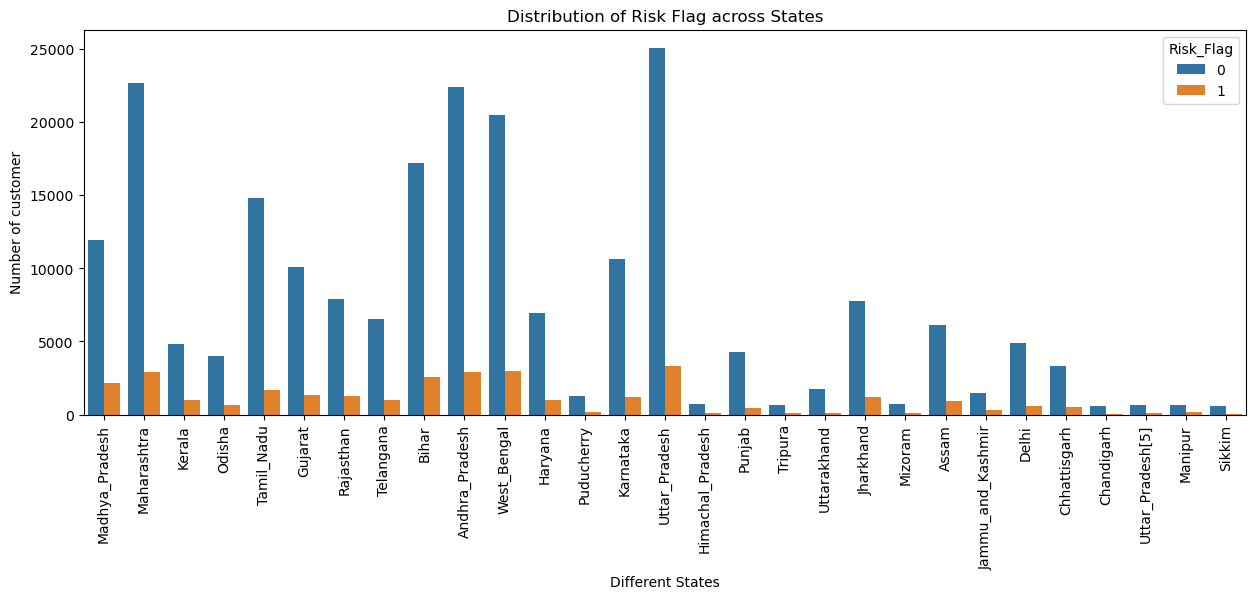

In [20]:
plt.figure(figsize=(15, 5))

sns.countplot(data=df, x='STATE', hue='Risk_Flag')

plt.title("Distribution of Risk Flag across States")
plt.xlabel("Different States")
plt.ylabel("Number of customer")
plt.xticks(rotation=90)

plt.show()

##### Insight:
            • Uttar Pradesh has highest number of loan taker, That is 28400.
            • Maharashtra has second highest number of loan taker, That is 25562.
            • Andhra Pradesh third highest number of loan taker, That is 25297.
            
         And
            • Sikkim has lowest number of loan taker, That is 608.
            • Chandigarh has second lowest number of loan taker, That is 656.

### Checking correlation between variables

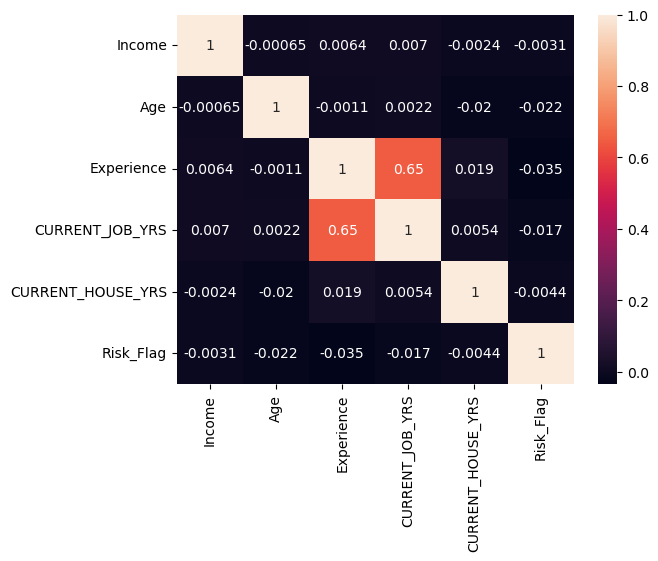

In [21]:
sns.heatmap(df.corr(), annot=True)
plt.show()

"CURRENT_JOB_YRS" column have a high colleration with "Ecperience" column

## Feature Selection

#### drop Name and "CURRENT_JOB_YRS" columns 

In [22]:
df.drop(columns='CURRENT_JOB_YRS', inplace=True)

In [23]:
X = df.drop(columns='Risk_Flag')
y = df['Risk_Flag']

### Label Encoding

In [24]:
encoder = LabelEncoder()

In [25]:
cols = X.select_dtypes('object')
for col in cols:
    X[col] = encoder.fit_transform(X[col])

In [26]:
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_HOUSE_YRS
Id,,,,,,,,,,
1,1303834,23,3,1,2,0,33,251,13,13
2,7574516,40,10,1,2,0,43,227,14,13
3,3991815,66,4,0,2,0,47,8,12,10
4,6256451,41,2,1,2,1,43,54,17,12
5,5768871,47,11,1,2,0,11,296,22,14


### RandomOverSampler

In [27]:
rd_over_sample = RandomOverSampler()
X_sampled, y_sampled = rd_over_sample.fit_resample(X, y)

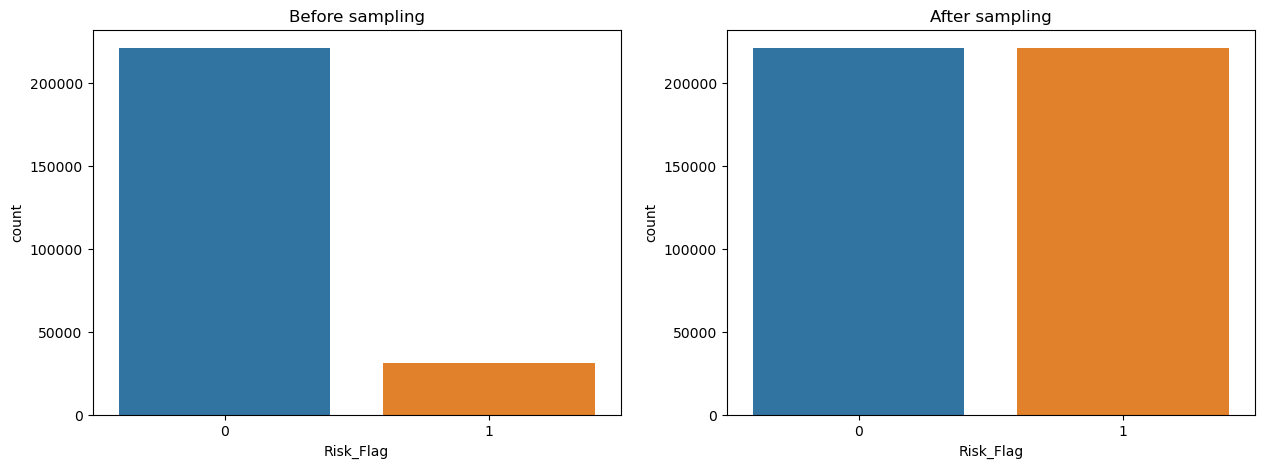

In [28]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(data=df, x='Risk_Flag')
plt.title('Before sampling')
plt.xlabel('Risk_Flag')

# Plot After sampling
plt.subplot(1,2,2)
sns.countplot(x=y_sampled)
plt.title('After sampling')
plt.xlabel('Risk_Flag')
plt.show()

### Split data into train and test

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.20, random_state=42)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(353606, 10)
(353606,)
(88402, 10)
(88402,)


### Building Prediction Model using Logistic Regression

In [31]:
model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42).fit(X_train, y_train)

In [32]:
y_pred = model.predict(X_test)

<Axes: >

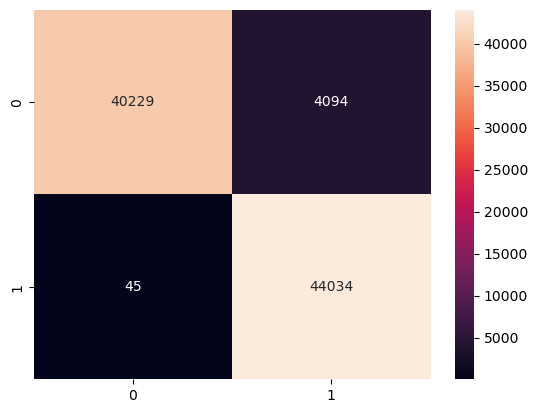

In [33]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt=".0f")

In [34]:
mean_absolute_error(y_test, y_pred)

0.046820207687608875

In [35]:
accuracy_score(y_test, y_pred)

0.9531797923123911

In [36]:
auc = roc_auc_score(y_test, y_pred)
auc

0.953305855896374

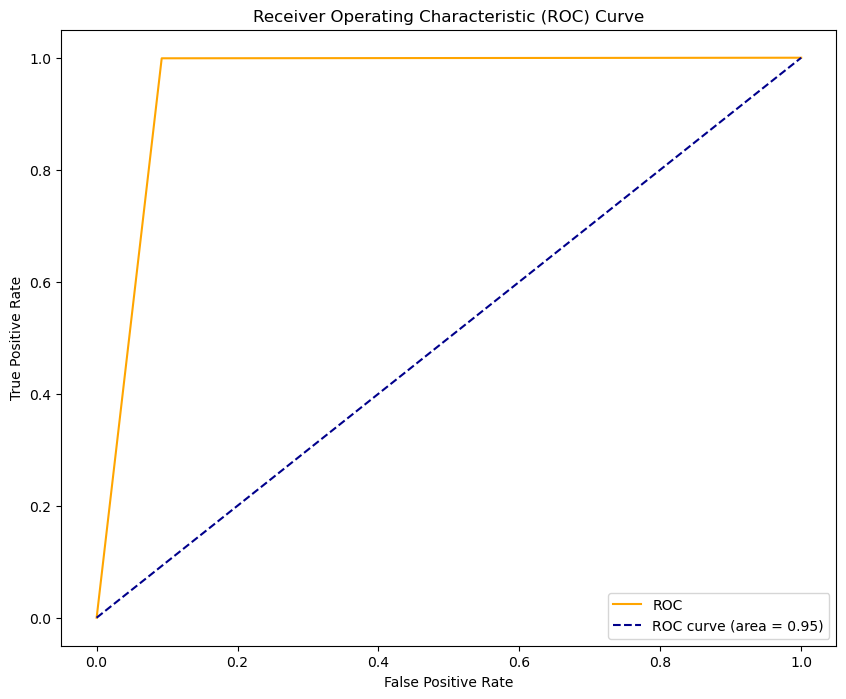

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### K-Fold Cross Validation

In [38]:
cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(cv_scores))

Cross-validation scores:[0.94885608 0.9480211  0.94940682 0.94991587 0.94912402]


In [39]:
print('Average cross-validation score: {:.4f}'.format(cv_scores.mean()))

Average cross-validation score: 0.9491


In [40]:
feature_importances = pd.DataFrame({
    'features' : df.drop(columns='Risk_Flag').columns, 
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True)

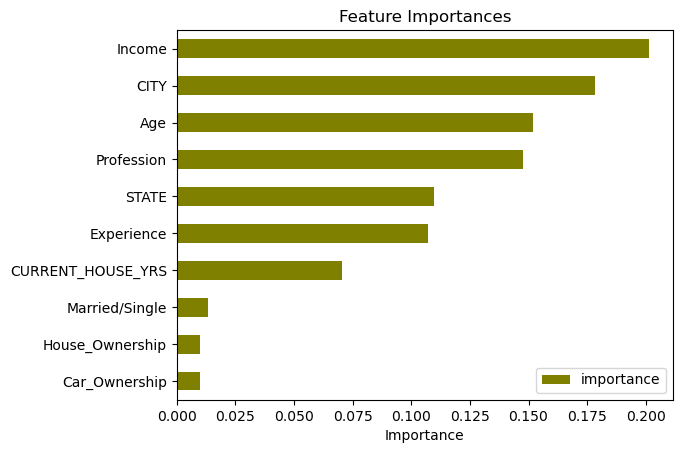

In [41]:
feature_importances.plot(kind='barh', color='olive', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.show()

##### MODEL EVALUATION SUMMARY :

                        Model accuracy : 95.40%
                        AUC            : 0.9541
                        K-Fold         : 0.9490

## PREDICTIONS ON TEST DATA

In [42]:
df_test = pd.read_csv('Dataset/test.csv', index_col=0)
df_test.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
ID,,,,,,,,,,,
1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [43]:
df_test.isna().any().sum()

0

In [44]:
df_test.drop(columns='CURRENT_JOB_YRS', inplace=True)

In [45]:
cols = df_test.select_dtypes('object')
for col in cols:
    df_test[col] = encoder.fit_transform(df_test[col])

In [46]:
df_test.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_HOUSE_YRS
ID,,,,,,,,,,
1,7393090,59,19,1,2,0,26,181,28,13
2,1215004,25,5,1,2,0,24,131,14,10
3,8901342,50,12,1,2,0,30,290,14,14
4,1944421,49,9,0,2,1,1,171,14,12
5,13429,25,18,1,2,1,12,39,28,11


In [47]:
test_pred = model.predict(df_test)

In [48]:
data_frame = {'Customer Id': df_test.index, 'Risk_Flag': test_pred} 
     
prediction_df = pd.DataFrame(data_frame)
prediction_df

,Customer Id,Risk_Flag
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [49]:
prediction_df.to_csv("Dataset/Loan_default_predicted_jagadish.csv")